### Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os

In [2]:
# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

#Keras
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv("clean_symptoms.csv") #This data set contains the data already preprocessed
data.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Disease
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [4]:
# Find the number of unique diseases
len(data.Disease.unique())

41

In [5]:
data.Disease.unique()

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

In [6]:
data.iloc[:,:-1].astype(int) #change data into int since neural networks only take numbers

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,0,1,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,0,1,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
data.dtypes

itching                  int64
skin_rash                int64
nodal_skin_eruptions     int64
continuous_sneezing      int64
shivering                int64
                         ...  
blister                  int64
red_sore_around_nose     int64
yellow_crust_ooze        int64
prognosis                int64
Disease                 object
Length: 133, dtype: object

In [8]:
#Encoding the Labels...
encoder = LabelEncoder()
target = data.iloc[:,-1]
y = encoder.fit_transform(target)

In [9]:
y

array([15, 15, 15, 15, 15, 15, 15, 15, 15, 15,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,  9,  9,  9,  9,
        9,  9,  9,  9,  9,  9, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 33,
       33, 33, 33, 33, 33, 33, 33, 33, 33,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 17, 17, 17, 17, 17,
       17, 17, 17, 17, 17,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6, 23, 23,
       23, 23, 23, 23, 23, 23, 23, 23, 30, 30, 30, 30, 30, 30, 30, 30, 30,
       30,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7, 32, 32, 32, 32, 32, 32,
       32, 32, 32, 32, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 29, 29, 29,
       29, 29, 29, 29, 29, 29, 29,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
       11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 37, 37, 37, 37, 37, 37, 37,
       37, 37, 37, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 19, 19, 19, 19,
       19, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 21,
       21, 21, 21, 21, 21

In [10]:
y.shape

(1000,)

In [11]:
#Scaling Feature columns...
min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(np.array(data.iloc[:,:-1], dtype = int))
print(X.shape)

(1000, 132)


### Building and Training The Model

In [12]:
# split the data into train, test and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape, X_val.shape, y_val.shape)

(640, 132) (640,) (200, 132) (200,) (160, 132) (160,)


In [13]:
# build the model
model = Sequential() #using sequential model with 4 layers in neural network
model.add(Dense(256,input_dim = X_train.shape[1],activation='relu'))
model.add(Dense(128,activation = 'relu'))
model.add(Dense(41, activation = 'softmax')) #number of outputs

opt_adam = keras.optimizers.Adam(learning_rate=0.001)

#compile over adam optimizer
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer = opt_adam,
             metrics=[keras.metrics.SparseCategoricalAccuracy()])

#train
model_history_adam = model.fit(X_train,
          y_train,
          validation_data=(X_val, y_val),
          batch_size = 32,
          epochs = 200,
          verbose=1)

Epoch 1/200
20/20 [==============================] - 1s 26ms/step - loss: 3.4172 - sparse_categorical_accuracy: 0.4250 - val_loss: 3.0263 - val_sparse_categorical_accuracy: 0.7563
Epoch 2/200
20/20 [==============================] - 0s 6ms/step - loss: 2.4786 - sparse_categorical_accuracy: 0.8734 - val_loss: 1.9214 - val_sparse_categorical_accuracy: 0.8875
Epoch 3/200
20/20 [==============================] - 0s 6ms/step - loss: 1.2862 - sparse_categorical_accuracy: 0.9422 - val_loss: 0.8163 - val_sparse_categorical_accuracy: 0.9312
Epoch 4/200
20/20 [==============================] - 0s 7ms/step - loss: 0.4461 - sparse_categorical_accuracy: 0.9812 - val_loss: 0.2462 - val_sparse_categorical_accuracy: 0.9937
Epoch 5/200
20/20 [==============================] - 0s 6ms/step - loss: 0.1431 - sparse_categorical_accuracy: 0.9953 - val_loss: 0.1111 - val_sparse_categorical_accuracy: 1.0000
Epoch 6/200
20/20 [==============================] - 0s 6ms/step - loss: 0.0668 - sparse_categorical_acc

20/20 [==============================] - 0s 7ms/step - loss: 8.0079e-04 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.0016 - val_sparse_categorical_accuracy: 1.0000
Epoch 47/200
20/20 [==============================] - 0s 7ms/step - loss: 7.6226e-04 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.0016 - val_sparse_categorical_accuracy: 1.0000
Epoch 48/200
20/20 [==============================] - 0s 7ms/step - loss: 7.3600e-04 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.0015 - val_sparse_categorical_accuracy: 1.0000
Epoch 49/200
20/20 [==============================] - 0s 7ms/step - loss: 7.0399e-04 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.0015 - val_sparse_categorical_accuracy: 1.0000
Epoch 50/200
20/20 [==============================] - 0s 7ms/step - loss: 6.7345e-04 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.0014 - val_sparse_categorical_accuracy: 1.0000
Epoch 51/200
20/20 [==============================] - 0s 7ms/step - loss: 6.4975e-04 - sparse

20/20 [==============================] - 0s 8ms/step - loss: 1.9708e-04 - sparse_categorical_accuracy: 1.0000 - val_loss: 5.7344e-04 - val_sparse_categorical_accuracy: 1.0000
Epoch 91/200
20/20 [==============================] - 0s 7ms/step - loss: 1.9171e-04 - sparse_categorical_accuracy: 1.0000 - val_loss: 5.6014e-04 - val_sparse_categorical_accuracy: 1.0000
Epoch 92/200
20/20 [==============================] - 0s 8ms/step - loss: 1.8754e-04 - sparse_categorical_accuracy: 1.0000 - val_loss: 5.4941e-04 - val_sparse_categorical_accuracy: 1.0000
Epoch 93/200
20/20 [==============================] - 0s 7ms/step - loss: 1.8294e-04 - sparse_categorical_accuracy: 1.0000 - val_loss: 5.3633e-04 - val_sparse_categorical_accuracy: 1.0000
Epoch 94/200
20/20 [==============================] - 0s 8ms/step - loss: 1.7886e-04 - sparse_categorical_accuracy: 1.0000 - val_loss: 5.2792e-04 - val_sparse_categorical_accuracy: 1.0000
Epoch 95/200
20/20 [==============================] - 0s 7ms/step - loss:

20/20 [==============================] - 0s 8ms/step - loss: 8.0158e-05 - sparse_categorical_accuracy: 1.0000 - val_loss: 3.1532e-04 - val_sparse_categorical_accuracy: 1.0000
Epoch 134/200
20/20 [==============================] - 0s 8ms/step - loss: 7.8875e-05 - sparse_categorical_accuracy: 1.0000 - val_loss: 3.1505e-04 - val_sparse_categorical_accuracy: 1.0000
Epoch 135/200
20/20 [==============================] - 0s 8ms/step - loss: 7.7585e-05 - sparse_categorical_accuracy: 1.0000 - val_loss: 3.0505e-04 - val_sparse_categorical_accuracy: 1.0000
Epoch 136/200
20/20 [==============================] - 0s 8ms/step - loss: 7.6058e-05 - sparse_categorical_accuracy: 1.0000 - val_loss: 3.0734e-04 - val_sparse_categorical_accuracy: 1.0000
Epoch 137/200
20/20 [==============================] - 0s 8ms/step - loss: 7.4578e-05 - sparse_categorical_accuracy: 1.0000 - val_loss: 3.0187e-04 - val_sparse_categorical_accuracy: 1.0000
Epoch 138/200
20/20 [==============================] - 0s 8ms/step - 

20/20 [==============================] - 0s 9ms/step - loss: 3.9165e-05 - sparse_categorical_accuracy: 1.0000 - val_loss: 2.0722e-04 - val_sparse_categorical_accuracy: 1.0000
Epoch 177/200
20/20 [==============================] - 0s 8ms/step - loss: 3.8469e-05 - sparse_categorical_accuracy: 1.0000 - val_loss: 2.0748e-04 - val_sparse_categorical_accuracy: 1.0000
Epoch 178/200
20/20 [==============================] - 0s 7ms/step - loss: 3.8005e-05 - sparse_categorical_accuracy: 1.0000 - val_loss: 2.0855e-04 - val_sparse_categorical_accuracy: 1.0000
Epoch 179/200
20/20 [==============================] - 0s 7ms/step - loss: 3.7557e-05 - sparse_categorical_accuracy: 1.0000 - val_loss: 2.0272e-04 - val_sparse_categorical_accuracy: 1.0000
Epoch 180/200
20/20 [==============================] - 0s 8ms/step - loss: 3.6820e-05 - sparse_categorical_accuracy: 1.0000 - val_loss: 1.9963e-04 - val_sparse_categorical_accuracy: 1.0000
Epoch 181/200
20/20 [==============================] - 0s 7ms/step - 

In [14]:
model_history_adam.history['loss']

[3.4171836376190186,
 2.4785993099212646,
 1.2861855030059814,
 0.44609206914901733,
 0.14307504892349243,
 0.0668225809931755,
 0.04066824913024902,
 0.028420310467481613,
 0.022295337170362473,
 0.017534373328089714,
 0.014323748648166656,
 0.011891582980751991,
 0.010321027599275112,
 0.00885219406336546,
 0.0077507286332547665,
 0.006684927735477686,
 0.005944177974015474,
 0.005239150021225214,
 0.004706008825451136,
 0.004302403423935175,
 0.003814124967902899,
 0.003505305154249072,
 0.003192693693563342,
 0.00294684455730021,
 0.0027206868398934603,
 0.0025349350180476904,
 0.0023514057975262403,
 0.0021632362622767687,
 0.002005690708756447,
 0.0019089622655883431,
 0.001783848972991109,
 0.001657725078985095,
 0.0015574900899082422,
 0.0014831474982202053,
 0.0014020337257534266,
 0.0013208889868110418,
 0.0012433762894943357,
 0.0011744898511096835,
 0.0011157874250784516,
 0.0010764618637040257,
 0.0010128183057531714,
 0.0009572879644110799,
 0.0009164366638287902,
 0.0008

### Display The Model Accuracy and Losses

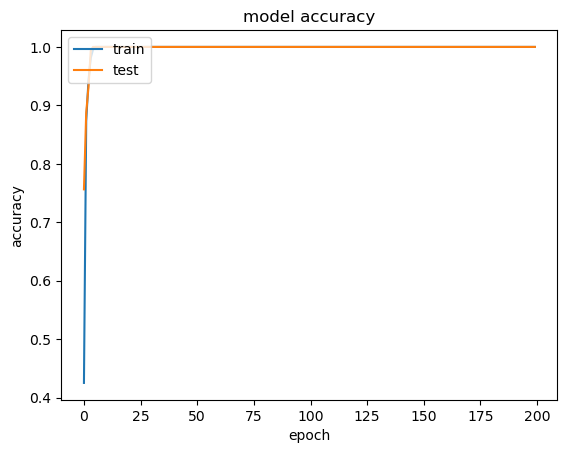

In [15]:
plt.plot(model_history_adam.history['sparse_categorical_accuracy'])
plt.plot(model_history_adam.history['val_sparse_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

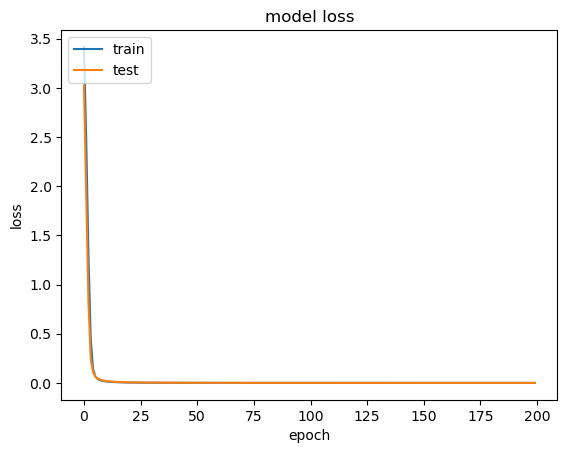

In [16]:
plt.plot(model_history_adam.history['loss'])
plt.plot(model_history_adam.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [17]:
model.save("sympdisease.h5") #save model in hierarchical data format

### Evaluate The Model

In [18]:
#test the model on test-data
test_loss, test_acc = model.evaluate(X_test, y_test)
print('test_acc: ',test_acc,'\ntest_loss: ',test_loss)

7/7 [==============================] - 0s 3ms/step - loss: 1.4119e-04 - sparse_categorical_accuracy: 1.0000
test_acc:  1.0 
test_loss:  0.00014118955004960299


In [19]:
predictions = model.predict(X_test)

7/7 [==============================] - 0s 2ms/step


In [21]:
value = np.argmax(predictions[4])

In [22]:
#Predicted disease
data['Disease'][np.where(y==value)[0][0]]

'Hypertension '

In [24]:
#Display predicted vs actual value
for index, entry in enumerate(predictions[0:20,:]):
    print(f'predicted:{np.argmax(entry)} ,actual:{y_test[index]}')

predicted:38 ,actual:38
predicted:34 ,actual:34
predicted:0 ,actual:0
predicted:35 ,actual:35
predicted:23 ,actual:23
predicted:31 ,actual:31
predicted:4 ,actual:4
predicted:11 ,actual:11
predicted:23 ,actual:23
predicted:30 ,actual:30
predicted:39 ,actual:39
predicted:30 ,actual:30
predicted:6 ,actual:6
predicted:15 ,actual:15
predicted:11 ,actual:11
predicted:38 ,actual:38
predicted:8 ,actual:8
predicted:6 ,actual:6
predicted:32 ,actual:32
predicted:36 ,actual:36
